### 1d_1.ipynb
#### Examples of 1D range expansions.
---
First, include RESK:

In [1]:
include("../resk.jl")

RESK successfully loaded.


Let's run a small simulation of a range expansion assuming the finite-sites model of individuals. This model is quite realistic in that it simulates every locus of every individual, every generation.

All `rangeexp` methods will generate a habitat (that allows for individual structure above) and seed it with individuals automatically, after which the burn-in and expansion phases begin. By default, individuals are seeded on one side of the habitat (and the population will expand to the other side).

You can always reference the method descriptions to find out more about them. (Note that VSCode's Intellisense doesn't include the "description on hover" functionality in `.ipynb` yet -- it does in `.jl`)

So, for a one-sided expansion we use the `rangeexp_ray` function to simulate 10+10 generations (burn-in and proper expansion respectively):

In [2]:
test = rangeexp_ray(10,10;data_to_generate="FPSN")

Dict{String, Any} with 9 entries:
  "AAsel" => Float32[0.0 0.0 … 0.333333 0.615385; 0.0 0.0 … 0.388889 0.315789; …
  "pops"  => Float32[25.0 22.0 … 14.0 8.0; 16.0 16.0 … 19.0 22.0; … ; NaN NaN ……
  "aasel" => Float32[500.0 499.679 … 494.583 493.538; 500.0 499.417 … 494.056 4…
  "fitn"  => Float32[1.0 1.0 … 0.999333 0.99877; 1.0 1.0 … 0.999222 0.999368; ……
  "aaneu" => Float32[500.0 499.714 … 495.5 495.846; 500.0 499.667 … 495.0 495.0…
  "Aasel" => Float32[0.0 0.321429 … 5.08333 5.84615; 0.0 0.583333 … 5.55556 5.3…
  "Aaneu" => Float32[0.0 0.285714 … 4.33333 3.84615; 0.0 0.333333 … 4.77778 4.7…
  "AAneu" => Float32[0.0 0.0 … 0.166667 0.307692; 0.0 0.0 … 0.222222 0.210526; …
  "stats" => Dict{String, Any}("capacity"=>20, "wlddim"=>1, "max_burnin"=>(5,),…

The output is a dictionary with multiple data arrays.

For the sake of economising resources, you have to specify which data are returned in `data_to_generate`. We have just generated all possible data (**F** for fitness [`fitn`], **P** for populations [`pops`], **S** for selected mutations [`AAsel`,`Aasel`,`aasel`], and **N** for neutral mutations [`AAneu`,`Aaneu`,`aaneu`]).

A statistics array is also always returned:

In [3]:
test["stats"]

Dict{String, Any} with 22 entries:
  "capacity"         => 20
  "wlddim"           => 1
  "max_burnin"       => (5,)
  "name"             => "2024-09-07_15-01-33"
  "startfill"        => UnitRange{Int64}[1:5]
  "domin_coef"       => 0
  "n_gens_burnin"    => 10
  "prop_of_del_muts" => 0.9
  "migr_rate"        => 0.1
  "sel_loci"         => [320, 949, 139, 592, 22, 635, 177, 780, 990, 7  …  308,…
  "max"              => (100,)
  "prolif_rate"      => 1.8
  "loci"             => [0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002…
  "sel_coef"         => 0.002
  "n_gens"           => 20
  "migr_mode"        => "ort"
  "n_gens_exp"       => 10
  "mut_rate"         => 0.7567
  "n_loci"           => 1000
  ⋮                  => ⋮

This shows different statistics about the habitat as well as the range expansion.

Now, let's return to look at some data that we got. `reskplots.jl` has a selection of unique plotting functions that start with `re_plot_` or `re_heatmap_`. These aid in viewing the data returned in `rangeexp_` functions.

Let's create an animation of the distribution of deme populations (`pops`) in time:

RESKPlots successfully loaded.
(2.0f0, 35.0f0)


┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_1CvWHixq1m.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_1CvWHixq1m.gif")
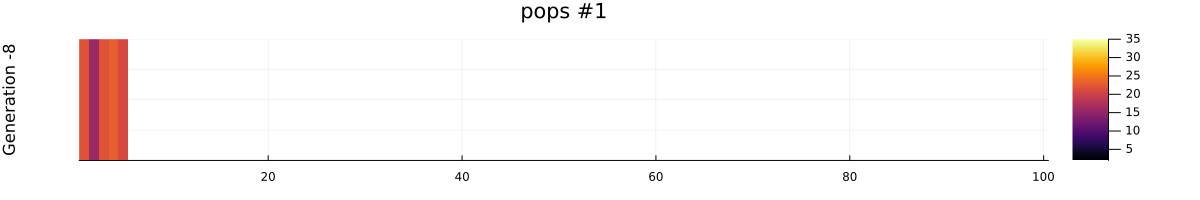

In [4]:
include("../reskplots.jl")
re_heatmap(test,"pops")

We see a one-dimensional animation spanning generations from -10 to 10: the burn-in generations are negative by default. As we can notice, the population starts to go right a little bit towards the end.

---

Let's confirm that with a longer expansion. And let's also make multiple replicates this time by including the number of replicates as the third argument (1 is default). Replicates are automatically parallel-computed:

In [8]:
test2 = rangeexp_ray(10,40,4;data_to_generate="FPSN")

Dict{String, Any} with 9 entries:
  "AAsel" => Float32[0.0 0.0 … 3.42857 3.72222; 0.0 0.0 … 4.88889 5.18182; … ; …
  "pops"  => Float32[46.0 32.0 … 19.0 14.0; 25.0 23.0 … 11.0 8.0; … ; NaN NaN ……
  "aasel" => Float32[500.0 499.727 … 484.357 483.611; 500.0 499.517 … 480.889 4…
  "fitn"  => Float32[1.0 1.0 … 0.993172 0.99259; 1.0 1.0 … 0.990289 0.989699; ……
  "aaneu" => Float32[500.0 499.545 … 485.071 484.778; 500.0 499.483 … 488.333 4…
  "Aasel" => Float32[0.0 0.272727 … 12.2143 12.6667; 0.0 0.482759 … 14.2222 14.…
  "Aaneu" => Float32[0.0 0.454545 … 12.0714 13.0556; 0.0 0.517241 … 10.1111 10.…
  "AAneu" => Float32[0.0 0.0 … 2.85714 2.16667; 0.0 0.0 … 1.55556 1.54545; … ; …
  "stats" => Dict{String, Any}("capacity"=>20, "wlddim"=>1, "max_burnin"=>(5,),…

The title of the plot above ("pops #1") refers to the iterate #1 (out of 1) that we generated. Now that we have 4 iterates, let's see the `pops` for the 4th one:

(1.0f0, 43.0f0)


┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_NA7OnKPmlW.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_NA7OnKPmlW.gif")
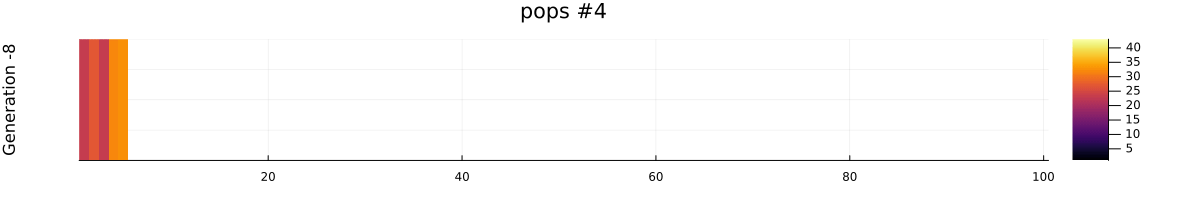

In [9]:
re_heatmap(test2,"pops";re_index=4)

Note that the maximum value has changed (the plots automatically scale).

RESK's plotting functions also include predefined colour bounds that thake into account the specifics of the plotted data type, that are activated by setting `defc=true`.

For example, the following shows the same population distribution as above, but limits the colour maximum to the deme capacity:

┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_Lo9KRAL8lm.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_Lo9KRAL8lm.gif")
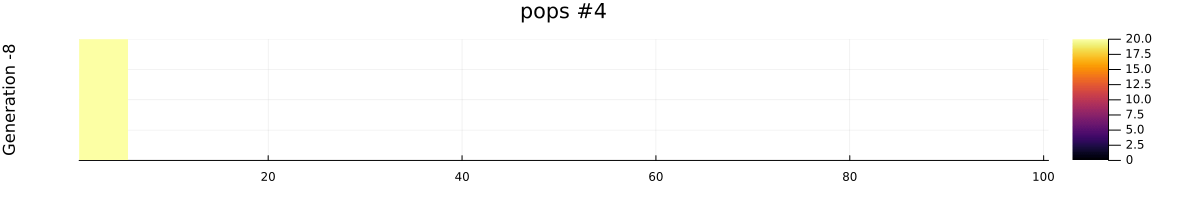

In [10]:
re_heatmap(test2,"pops";re_index=4,defc=true)

Let's plot the evolution of deme-average fitness in time. We will also set Julia's Plots library's `clim` parameter ourselves:

┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_zo1E5iDgFa.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_zo1E5iDgFa.gif")
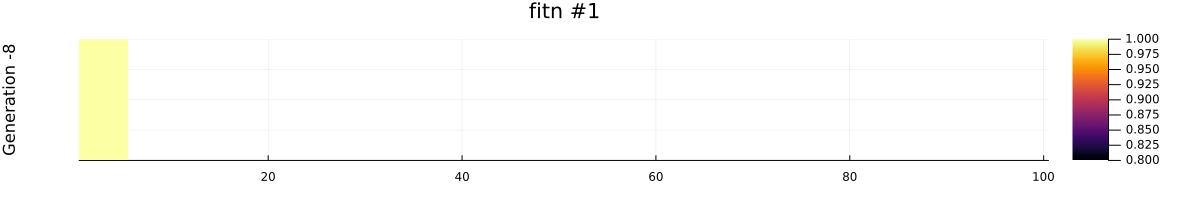

In [11]:
re_heatmap(test2,"fitn",clim=(0.8,1.0))

---

For a simpler calculation, it is sometimes viable to simulate a range expansion using the infinite sites model. Simply use the suffix `_inf` for infinite-sites simulations.

This time, **M** signifies mutations (`del` for deleterious, `ben` for beneficial):

In [12]:
test3 = rangeexp_ray_inf(10,40,4;data_to_generate="FPM")

Dict{String, Any} with 5 entries:
  "pops"  => Float32[42.0 31.0 … 25.0 14.0; 45.0 35.0 … 15.0 12.0; … ; NaN NaN …
  "del"   => Float32[30.0 22.0 … 17.0 10.0; 23.0 26.0 … 16.0 3.0; … ; NaN NaN ……
  "fitn"  => Float32[1.0 0.998781 … 0.977716 0.976968; 1.0 0.998979 … 0.979668 …
  "stats" => Dict{String, Any}("wlddim"=>1, "max_burnin"=>(5,), "name"=>"2024-0…
  "ben"   => Float32[3.0 4.0 … 1.0 1.0; 1.0 3.0 … 1.0 1.0; … ; NaN NaN … NaN Na…

It is much faster, although it ignores the biallelic structure, hence there is no dominance coefficient. Instead of *n_loci*, it has *n_segr_regions*; and instead of *n_sel_loci*, it has *prop_of_sel_loci*:

In [13]:
test3["stats"]

Dict{String, Any} with 18 entries:
  "wlddim"            => 1
  "max_burnin"        => (5,)
  "name"              => "2024-09-07_15-03-05"
  "startfill"         => UnitRange{Int64}[1:5]
  "n_gens_burnin"     => 10
  "prop_of_del_muts"  => 0.9
  "migr_rate"         => 0.1
  "max"               => (100,)
  "n_segr_regions"    => 20
  "prolif_rate"       => 1.8
  "sel_coef"          => 0.002
  "n_gens"            => 50
  "migr_mode"         => "ort"
  "n_gens_exp"        => 40
  "mut_rate"          => 0.7567
  "max_exp"           => (100,)
  "n_demes_startfill" => 5
  "capacity"          => 20

Let's see their distribution from generation 1 to 20 (with negative burn-in: -10 to 10):

(0.0f0, 30.0f0)


┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_rCr8RCRIrw.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_rCr8RCRIrw.gif")
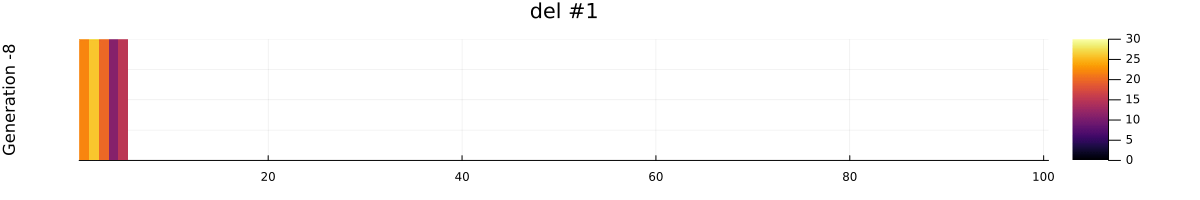

In [14]:
re_heatmap(test3,"del",1,20)

`re_heatmap` has another definition that lets us use it with any data. So the following is equivalent to the above graph:

(0.0f0, 36.0f0)


┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_Z4JwNq78HC.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_Z4JwNq78HC.gif")
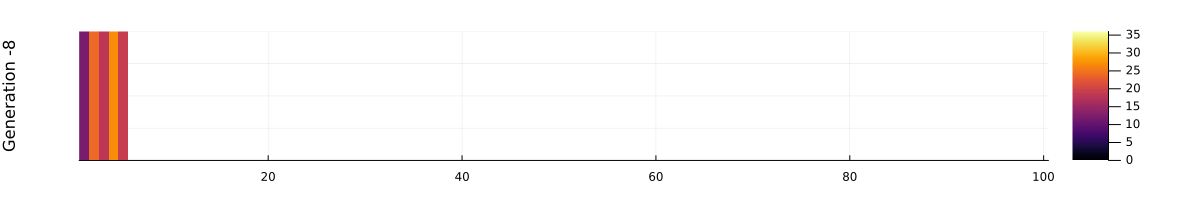

In [8]:
re_heatmap(test3["del"][:,:,1],1,20,n_gens_sub=10)

The `n_gens_sub` option lets us subtract a defined number of generations from the counter.

Let's also see the beneficial mutations:

(0.0f0, 8.0f0)


┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_jsve9MBU7k.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_jsve9MBU7k.gif")
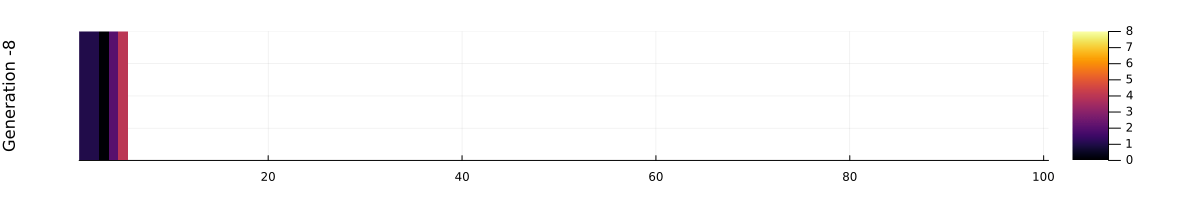

In [9]:
re_heatmap(test3["ben"][:,:,1],1,20,n_gens_sub=10)

---

Finally, here are some examples with a longer finite-sites expansion and a custom space size:

In [10]:
test = rangeexp_ray(30,200;x_max_burnin=5,x_max_exp=30,data_to_generate="FPSN")

Dict{String, Any} with 9 entries:
  "AAsel" => Float32[0.0 0.0 … 20.5455 19.8571; 0.0 0.0 … 15.7333 18.4737; … ; …
  "pops"  => Float32[24.0 23.0 … 15.0 15.0; 22.0 17.0 … 18.0 15.0; … ; NaN NaN …
  "aasel" => Float32[500.0 499.591 … 456.864 455.071; 500.0 499.56 … 451.133 45…
  "fitn"  => Float32[1.0 1.0 … 0.95985 0.961227; 1.0 1.0 … 0.969114 0.963816; ……
  "aaneu" => Float32[500.0 499.591 … 440.455 439.357; 500.0 499.6 … 433.333 437…
  "Aasel" => Float32[0.0 0.409091 … 22.5909 25.0714; 0.0 0.44 … 33.1333 27.2632…
  "Aaneu" => Float32[0.0 0.409091 … 28.4545 29.5; 0.0 0.4 … 43.2 34.2105; … ; N…
  "AAneu" => Float32[0.0 0.0 … 31.0909 31.1429; 0.0 0.0 … 23.4667 28.1579; … ; …
  "stats" => Dict{String, Any}("capacity"=>20, "wlddim"=>1, "max_burnin"=>(5,),…

┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_5uvwFWlIda.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_5uvwFWlIda.gif")
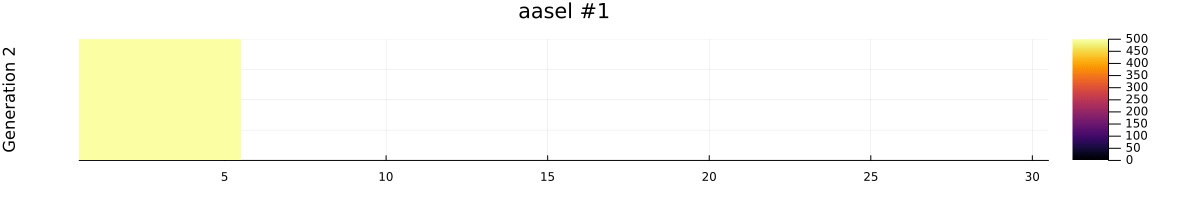

In [14]:
re_heatmap(test,"aasel";n_gens_sub=0,defc=true)

(436.0f0, 500.0f0)


┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_VMNmBCj03M.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_VMNmBCj03M.gif")
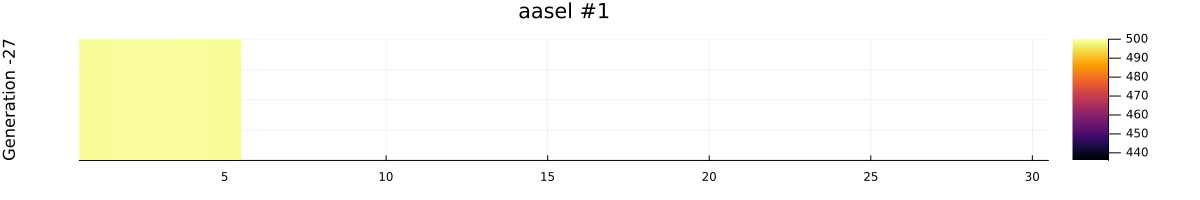

In [15]:
re_heatmap(test,"aasel";slow_factor=0.5,defc=false)

┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_N8ZSTipExk.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_N8ZSTipExk.gif")
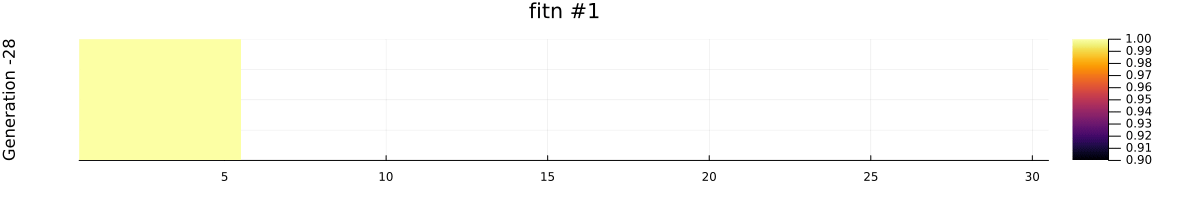

In [17]:
re_heatmap(test,"fitn";clim=(0.9,1.0))

Let's use the `front_array` method to get the front array and visualise its evolution in time:

(0.9513896703720093, 1.0)


┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_N2Po1ETi10.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_N2Po1ETi10.gif")
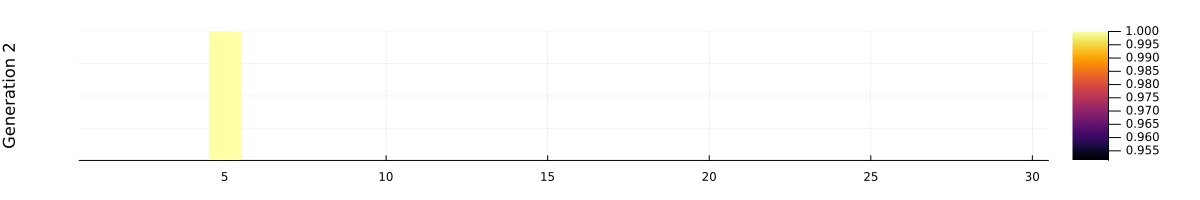

In [16]:
test_fitn_frontarr = front_array(test,"fitn";oneside=true)
re_heatmap(test_fitn_frontarr,1,100)

Now, `average_front` finds the average value of the front for every generation:

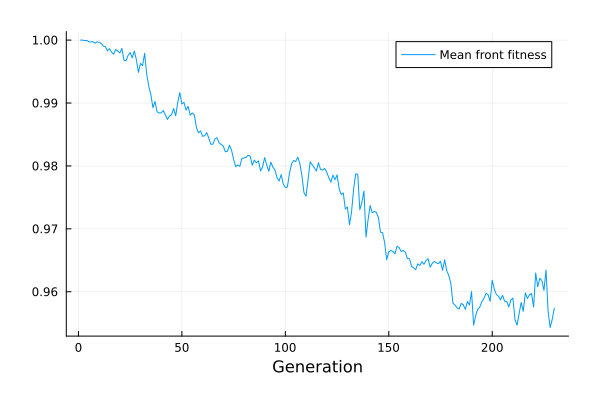

In [17]:
test_fitn_frontav = average_front(test,"fitn")
Plots.plot(test_fitn_frontav,xlabel="Generation",label="Mean front fitness")

And `average_all` finds the average value in the whole population for every generation:

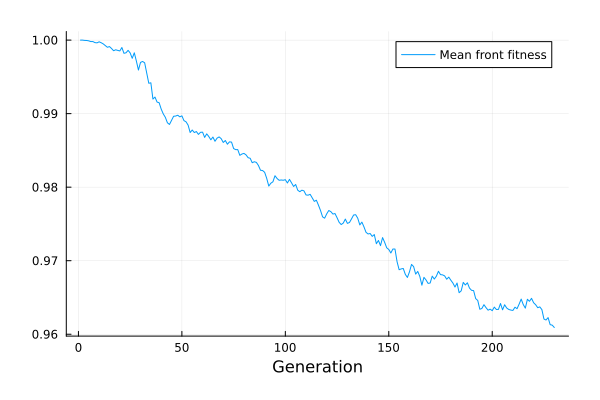

In [18]:
test_fitn_av = average_all(test,"fitn")
Plots.plot(test_fitn_av,xlabel="Generation",label="Mean front fitness")